In [104]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np
from itertools import product
import seaborn as sns
sns.set()

%matplotlib inline

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [105]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
btes = [[[[] for i in range(10)] for j in range(6)] for ii in range(7)]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(res)
            val.append(res[i])
            #print(res, "hi")
            for j in range(i+1):
                btes[ii][cv_][j].append(val[j]/res[j])
                #print(alg,cv_)
        #print(btes)
            
#code for bte of LF

for i in range(cv):
    filename = './crossval_res/LF__'+str(i+1)+'.pickle'
    err = unpickle(filename)
    #eta = [[] for i in range(10)]
    
    '''for j in range(10):
        for jj in range(j+1):
            #eta[j][jj] = err[jj][jj]/err[j][jj]
            eta[j].append(err[jj][jj]/err[j][jj])'''
    
    for j in range(10):
        for jj in range(10-j):
            btes[4][i][j].append(err[j][j]/err[jj+j][j])


#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for i in range(cv):
    filename = './crossval_res/Prog_NN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            btes[5][i][j].append(err[j][j]/err[jj+j][j]) 


for i in range(cv):
    filename = './crossval_res/DF_CNN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            btes[6][i][j].append(err[j][j]/err[jj+j][j]) 



In [106]:
mean_bte = [[[] for i in range(10)] for j in range(7)]


for alg in range(7):
    for j in range(10):
        tmp = 0
        for i in range(6):
            tmp += np.array(btes[alg][i][j])
        
        tmp=tmp/6
        mean_bte[alg][j].append(tmp)

#print(mean_eta)

In [107]:
#calculate average single task error
cv = 6
tasks = 10
mean_single_err = np.zeros(10,dtype=float)

for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res_singletask/single_task'+str(task+1)+'__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(err,task,mean_single_err[task])
        mean_single_err[task] += err
        
    mean_single_err[task] = mean_single_err[task]/cv
    
print(mean_single_err)

[0.65633333 0.73333333 0.58416667 0.68116667 0.66666667 0.655
 0.61133333 0.65766667 0.697      0.633     ]


In [108]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
fte_avg = np.zeros((7,10),dtype=float)
fte = [[[] for i in range(6)] for j in range(7)]

for ii,alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = unpickle(filename)
            fte[ii][cv_].append(mean_single_err[task]/err[task])
            fte_avg[ii][task] += mean_single_err[task]/err[task]
        fte_avg[ii][task] = fte_avg[ii][task]/6

In [109]:
mean_single_error_LF = np.zeros(10,dtype=float)

for cv_ in range(cv):
    filename = './crossval_res_singletask/LF_single_task__'+str(cv_+1)+'.pickle'
    err = unpickle(filename)
    mean_single_error_LF += err
    
mean_single_error_LF = mean_single_error_LF/6
mean_single_error_LF

array([0.62033333, 0.67133333, 0.59883333, 0.65183333, 0.60766667,
       0.59033333, 0.5555    , 0.61483333, 0.654     , 0.57133333])

In [110]:
for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res/'+'LF__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(mean_single_error_LF[task],err[task][task],task)
        fte[4][cv_].append(mean_single_error_LF[task]/err[task][task])
        fte_avg[4][task] += mean_single_error_LF[task]/err[task][task]
    fte_avg[4][task] = fte_avg[4][task]/6
        
fte_avg[4]

array([1.00041878, 1.03049647, 1.05124343, 1.0882666 , 1.0762054 ,
       1.10943181, 1.12196847, 1.15510691, 1.12943649, 1.15757975])

In [111]:
mean_single_err_2 = np.zeros((2,10),dtype=float)
algs = ['DF_CNN', 'Prog_NN']

for ii, alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res_singletask/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = 1-unpickle(filename)[99][0]
            mean_single_err_2[ii][task] += err  
        mean_single_err_2[ii][task] = mean_single_err_2[ii][task]/cv
        
mean_single_err_2[1][0]

0.2838333333333334

In [112]:
#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for cv_ in range(cv):
    filename = './crossval_res/Prog_NN__'+str(cv_+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for task in range(tasks):
        #print(fte[5][cv_])
        fte[5][cv_].append(mean_single_err_2[1][task]/err[task][task])
        fte_avg[5][task] += mean_single_err_2[1][task]/err[task][task]
        
fte_avg[5] = fte_avg[5]/6


for cv_ in range(cv):
    filename = './crossval_res/DF_CNN__'+str(cv_+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    for task in range(tasks):
        fte[6][cv_].append(mean_single_err_2[0][task]/err[task][task])
        fte_avg[6][task] += mean_single_err_2[0][task]/err[task][task]
        
fte_avg[6] = fte_avg[6]/6



In [113]:
#calculate TE
cv = 6
tasks = 10
mean_single_err = np.zeros(10,dtype=float)

for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res_singletask/single_task'+str(task+1)+'__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(err,task,mean_single_err[task])
        mean_single_err[task] += err
        
    mean_single_err[task] = mean_single_err[task]/cv
    
print(mean_single_err)

[0.65633333 0.73333333 0.58416667 0.68116667 0.66666667 0.655
 0.61133333 0.65766667 0.697      0.633     ]


In [114]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
tes = [[[[] for i in range(10)] for j in range(6)] for ii in range(7)]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(res)
            val.append(mean_single_err[i])
            #print(res, "hi")
            for j in range(i+1):
                tes[ii][cv_][j].append(val[j]/res[j])
                #print(alg,cv_)
        #print(btes)
            

In [115]:
mean_single_error_LF = np.zeros(10,dtype=float)

for cv_ in range(cv):
    filename = './crossval_res_singletask/LF_single_task__'+str(cv_+1)+'.pickle'
    err = unpickle(filename)
    mean_single_error_LF += err
    
mean_single_error_LF = mean_single_error_LF/6
mean_single_error_LF

array([0.62033333, 0.67133333, 0.59883333, 0.65183333, 0.60766667,
       0.59033333, 0.5555    , 0.61483333, 0.654     , 0.57133333])

In [116]:
#code for bte of LF

for i in range(cv):
    filename = './crossval_res/LF__'+str(i+1)+'.pickle'
    err = unpickle(filename)
    
    for j in range(10):
        for jj in range(10-j):
            tes[4][i][j].append(mean_single_error_LF[j]/err[jj+j][j])

In [117]:
mean_single_err_2 = np.zeros((2,10),dtype=float)
algs = ['DF_CNN', 'Prog_NN']

for ii, alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res_singletask/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = 1-unpickle(filename)[99][0]
            mean_single_err_2[ii][task] += err  
        mean_single_err_2[ii][task] = mean_single_err_2[ii][task]/cv
        
mean_single_err_2[1][0]

0.2838333333333334

In [118]:
#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for i in range(cv):
    filename = './crossval_res/Prog_NN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            tes[5][i][j].append(mean_single_err_2[1][j]/err[jj+j][j]) 
 

for i in range(cv):
    filename = './crossval_res/DF_CNN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            tes[6][i][j].append(mean_single_err_2[0][j]/err[jj+j][j]) 

In [119]:
mean_eta = [[[] for i in range(10)] for j in range(7)]


for alg in range(7):
    for j in range(10):
        tmp = 0
        for i in range(6):
            tmp += np.array(tes[alg][i][j])
        
        tmp=tmp/6
        mean_eta[alg][j].append(tmp)

In [120]:
eta= [mean_eta[4], mean_eta[6], mean_eta[1], mean_eta[0], mean_eta[2], mean_eta[3], mean_eta[5]]

In [121]:
te = {'LF':np.zeros(10,dtype=float), 'DF-CNN':np.zeros(10,dtype=float),'Online EWC':np.zeros(10,dtype=float), 'EWC':np.zeros(10,dtype=float), 'SI':np.zeros(10,dtype=float), 'LwF':np.zeros(10,dtype=float), 'Prog-NN':np.zeros(10,dtype=float)}

for count,name in enumerate(te.keys()):
    for i in range(10):
        te[name][i] = eta[count][i][0][9-i]

In [122]:
import pandas as pd
df = pd.DataFrame.from_dict(te)
df_ = pd.melt(df,var_name='Algorithms', value_name='Transfer Efficieny')
#ax = sns.stripplot(x="day", y="total_bill", data=tips)
print(df_)

   Algorithms  Transfer Efficieny
0          LF            1.119554
1          LF            1.097135
2          LF            1.106845
3          LF            1.135035
4          LF            1.117169
..        ...                 ...
65    Prog-NN            0.991733
66    Prog-NN            1.008675
67    Prog-NN            1.013511
68    Prog-NN            0.965276
69    Prog-NN            1.052027

[70 rows x 2 columns]


In [141]:
mean_te = {'LF':[1.13], 'DF-CNN':[0.75],'Online EWC':[0.96], 'EWC':[0.97], 'SI':[0.86], 'LwF':[1.00], 'Prog-NN':[1.02]}
mean_df = pd.DataFrame.from_dict(mean_te)
mean_df = pd.melt(mean_df,var_name='Algorithms', value_name='Transfer Efficieny')
print(mean_df)

   Algorithms  Transfer Efficieny
0          LF                1.13
1      DF-CNN                0.75
2  Online EWC                0.96
3         EWC                0.97
4          SI                0.86
5         LwF                1.00
6     Prog-NN                1.02


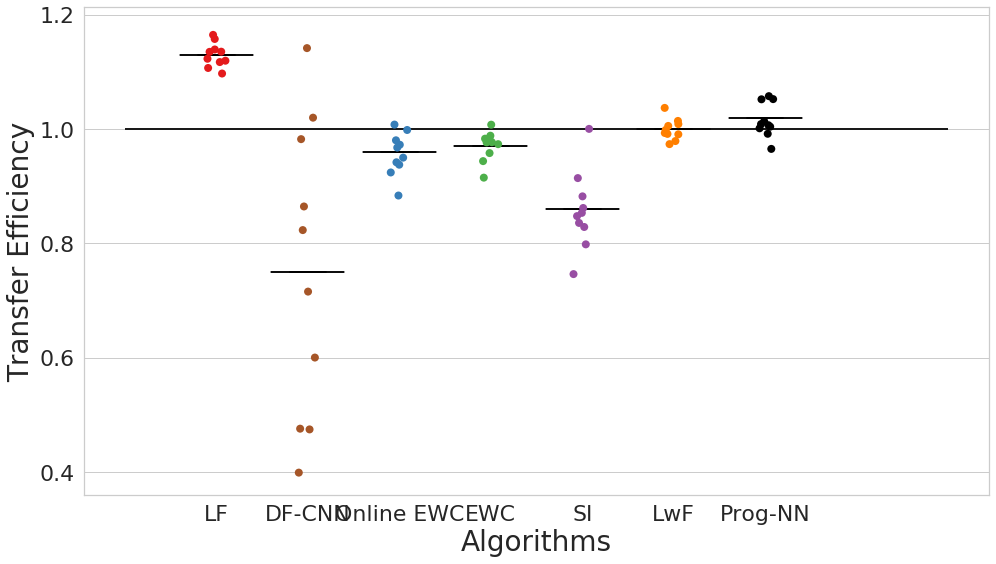

In [159]:
import seaborn as sns
sns.set(style="whitegrid")
clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
c = sns.color_palette(clr, n_colors=len(clr))

fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.tick_params(labelsize=22)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=8, ax=ax)
sns.boxplot(x="Algorithms", y="Transfer Efficieny", data=mean_df, palette=c, ax=ax)
ax.hlines(1, -1,8, colors='k', linestyles='solid',linewidth=2)
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=28)
ax_.set_ylabel('Transfer Efficiency', fontsize=28)
plt.savefig('TE.png', dpi=500)

In [124]:
names = ['Lifelong Forest', 'DF-CNN','Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
all_ftes = [fte_avg[4], fte_avg[6], fte_avg[1], fte_avg[0], fte_avg[2], fte_avg[3], fte_avg[5]]
mean_rte = [mean_bte[4], mean_bte[6], mean_bte[1], mean_bte[0], mean_bte[2], mean_bte[3], mean_bte[5]]
mean_eta_ = [mean_eta[4], mean_eta[6], mean_eta[1], mean_eta[0], mean_eta[2], mean_eta[3], mean_eta[5]]

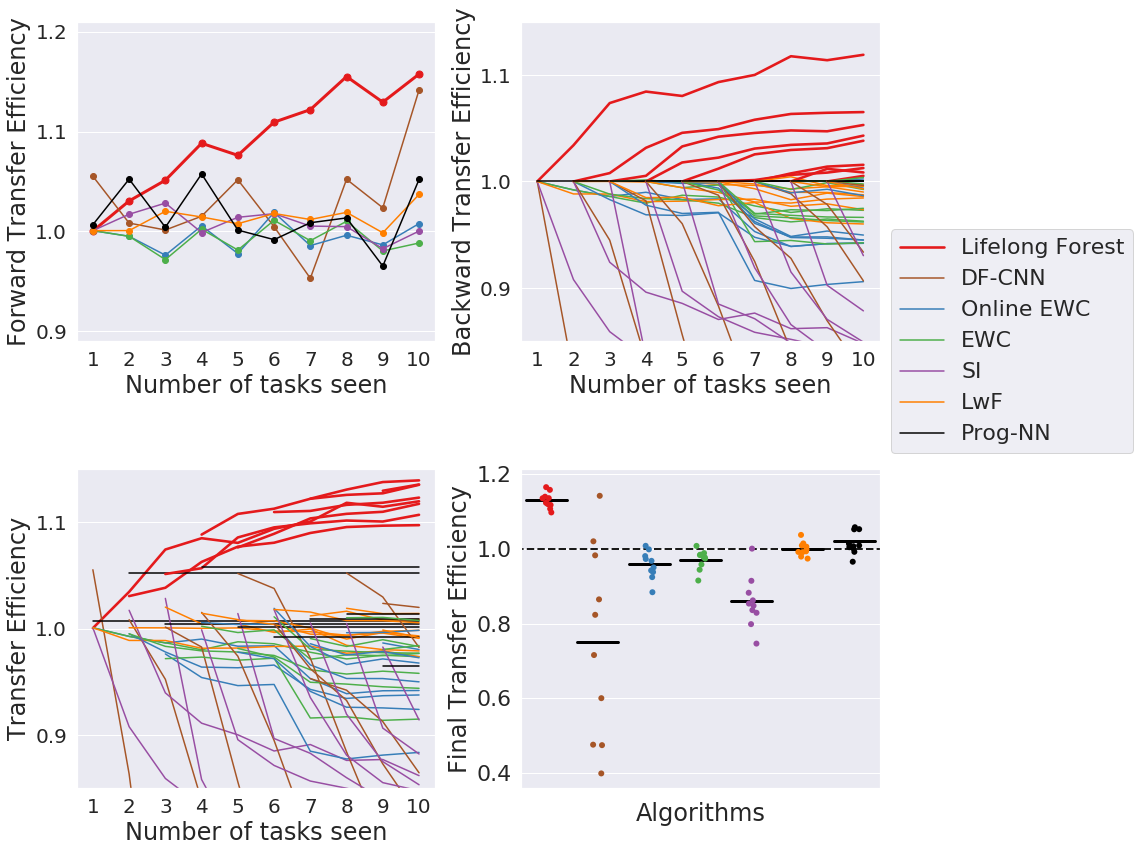

In [178]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=24
ticksize=20

fig, ax = plt.subplots(2,2, figsize=(16,12))
# plt.subplots_adjust(right=0.5)
items = []
for i, fte in enumerate(all_ftes):
    if i == 0:
        ax[0][0].plot(np.arange(1,11), fte, c=clr[i], marker='.', markersize=14, label=algos[i], linewidth=3)
        continue

    item = ax[0][0].plot(np.arange(1,11), fte, c=clr[i], marker='.', markersize=12, label=algos[i])
    items.append(item)
    
ax[0][0].set_xticks(np.arange(1,11))
ax[0][0].set_yticks([0.9, 1.0, 1.1, 1.2])
ax[0][0].set_ylim(0.89, 1.21)
ax[0][0].tick_params(labelsize=ticksize)
# ax[0].legend(algos, loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax[0][0].set_ylabel('Forward Transfer Efficiency', fontsize=fontsize)
ax[0][0].set_xlabel('Number of tasks seen', fontsize=fontsize)

ax[0][0].grid(axis='x')

n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(eta[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        else:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[0][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][1].set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax[0][1].legend(loc='center left', bbox_to_anchor=(1, 0), fontsize=22)
ax[0][1].set_yticks([.4,.6,.8,.9,1, 1.1])
ax[0][1].set_xticks(np.arange(1,11))
ax[0][1].set_ylim(0.85, 1.15)
ax[0][1].tick_params(labelsize=ticksize)
ax[0][1].grid(axis='x')


n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_eta_[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        else:
            if i == 0:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[1][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][0].set_ylabel('Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
#ax[1][0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax[1][0].set_yticks([.4,.6,.8,.9,1, 1.1])
ax[1][0].set_xticks(np.arange(1,11))
ax[1][0].set_ylim(0.85, 1.15)
ax[1][0].tick_params(labelsize=ticksize)
ax[1][0].grid(axis='x')





ax[1][1].tick_params(labelsize=22)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=6, ax=ax[1][1])
ax[1][1].hlines(1, -1,8, colors='k', linestyles='dashed',linewidth=2)
sns.boxplot(x="Algorithms", y="Transfer Efficieny", data=mean_df, palette=c, linewidth=3, ax=ax[1][1])
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=fontsize)
ax_.set_ylabel('Final Transfer Efficiency', fontsize=fontsize)
ax_.set_xticklabels([])

plt.tight_layout()
# lgd = fig.legend(algos, bbox_to_anchor=(1, 0.45), loc='center left', fontsize=18)
plt.savefig('fte_bte_wide.png', dpi=500)

In [182]:
res = unpickle('./rotation_res/EWC_10.pickle')
print(res)

[0.68075 0.6921 ]
